## 4.10 IC Coding Etiquette & Excel Reporting - Part 2
### This script will include
#### 00. Importing Libraries and Data

### Continuation of 4.10 Part 1
#### 04. Create a profiling variable
#### 05. Create and appropraite visualization to show the distribution of profiles
#### 06. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#### 07. Compare your customer profiles with regions and departments. Produce suitable charts to ilustrate your results
#### 08. Export visuals
#### 09. Export data

### 00. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a folderpath shortcut

path = r'C:\Users\Victoria\Desktop\Data Analytics Career Foundry\4.0 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
# Import 'orders_products_customers_merged.pkl' as ic_data

ic_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_data_4_10_p1.pkl'))

In [4]:
# Import department data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
# Check import ic_data

ic_data.shape

(32404859, 33)

In [6]:
# Check import ic_data

ic_data.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [7]:
# Check import df_dept

df_dept.head(22)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### 04. Create a customer profiling variable
#### Age Profile

In [8]:
# Creating age profile 'Senior', age >= 65

ic_data.loc[ic_data['age'] >= 65, 'age_flag' ] = 'Senior'

In [9]:
# Creating age profile 'Middle-age',  30 < age < 65

ic_data.loc[(ic_data['age'] < 65) & (ic_data['age'] > 30), 'age_flag'] = 'Middle-age'

In [10]:
# Creating age profile 'Young adult', age <= 30

ic_data.loc[ic_data['age'] <=30, 'age_flag'] = 'Young adult'

In [11]:
# Checking no values were excluded

ic_data['age_flag'].value_counts(dropna=False)

Middle-age     17230416
Senior          8575084
Young adult     6599359
Name: age_flag, dtype: int64

#### Income profile

In [12]:
# Creating income profile for 'Normal income'

ic_data.loc[ic_data['income']<=50000,'income_flag'] = 'Normal income'

In [13]:
# Creating income profile for 'Middle income'

ic_data.loc[(ic_data['income'] > 50000) & (ic_data['income'] <= 100000), 'income_flag'] = 'Middle income'

In [14]:
# Creating income profile for 'High income'

ic_data.loc[ic_data['income'] > 100000, 'income_flag'] = 'High income'

In [15]:
# Checking no values were excluded

ic_data['income_flag'].value_counts(dropna = False)

High income      14814202
Middle income    13996574
Normal income     3594083
Name: income_flag, dtype: int64

#### Department profile, adding department names to ic_data through merge

In [16]:
# Creating department profile

df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [17]:
# Confirming rename

df_dept.head(22)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
# Merging dataframe with department dataframe

df_merged = ic_data.merge(df_dept, on = 'department_id')

In [19]:
df_merged['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [20]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_order_days',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'customer_activity',
       'age_flag', 'income_flag', 'department'],
      dtype='object')

#### Dependants profile

In [21]:
# Creating dependants profile 'Single'

df_merged.loc[df_merged['n_dependants'] ==0, 'family_flag'] = 'Single'

In [22]:
# Creating dependants profile 'Family'

df_merged.loc[df_merged['n_dependants'] !=0, 'family_flag'] = 'Family'

In [23]:
# Checking no values were excluded

df_merged['family_flag'].value_counts(dropna=False)

Family    24307356
Single     8097503
Name: family_flag, dtype: int64

### 05. Create and appropraite visualization to show the distribution of profiles

I cleared the outputs to save memory.

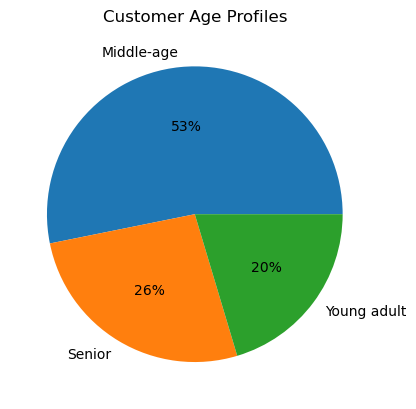

In [24]:
# Visualization for age profile as a pie chart

age_profile_pie = ic_data['age_flag'].value_counts().plot.pie(title='Customer Age Profiles', label='', autopct=('%1.f%%'))

Text(0.5, 1.0, 'Customer Age Profiles')

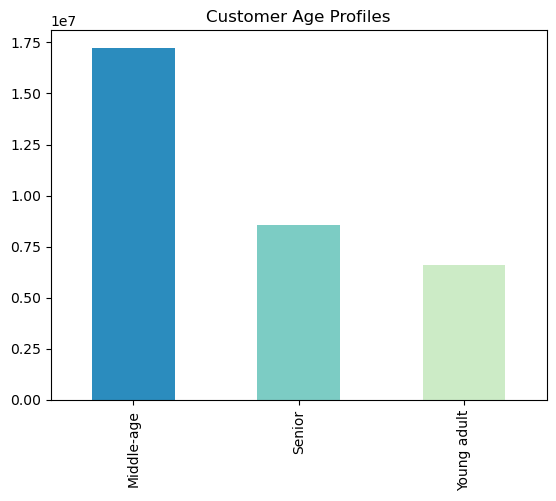

In [25]:
# Visualization for age profile as a bar chart

age_profile_bar = ic_data['age_flag'].value_counts().plot.bar(color=sns.color_palette('GnBu_r', 3))
plt.title('Customer Age Profiles')

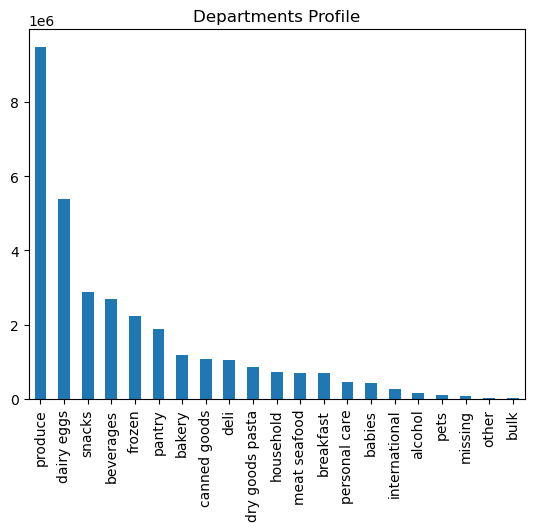

In [26]:
# Visualization for departments profile as bar chart

departments_profile_bar = df_merged['department'].value_counts().plot.bar(title = 'Departments Profile')

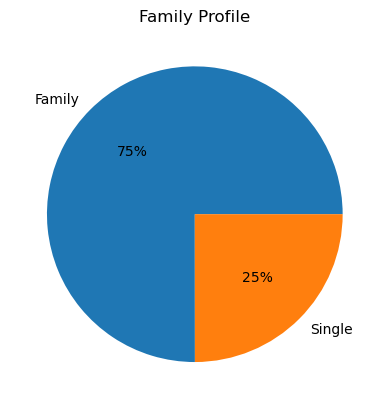

In [27]:
# Visualization for dependants profile as a pie chart 
dependants_profile_pie =df_merged['family_flag'].value_counts().plot.pie(title='Family Profile',label='',autopct=('%1.f%%'))

### 06. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Age

In [28]:
# Age aggregation based on 'days_since_prior_order' and 'prices'

age_stats = df_merged.groupby('age_flag').agg({'days_since_prior_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

In [29]:
age_stats

days_since_prior_order                  prices                
                               min   max       mean    min   max      mean
age_flag                                                                  
Middle-age                     0.0  30.0  11.104948    1.0  25.0  7.791527
Senior                         0.0  30.0  11.078641    1.0  25.0  7.796546
Young adult                    0.0  30.0  11.134870    1.0  25.0  7.782389

#### Income

In [30]:
# Income aggregation based on 'days_since_prior_order' and 'prices'

income_stats = df_merged.groupby(['income_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [31]:
income_stats

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
income_flag                                                                 
High income                      0.0  30.0  11.039865    1.0  25.0  7.959257
Middle income                    0.0  30.0  11.049312    1.0  25.0  7.893885
Normal income                    0.0  30.0  11.587220    1.0  25.0  6.696985

#### Department (goods)

In [32]:
# Department aggregation based on 'days_since_prior_order' and 'prices'

department_stats = df_merged.groupby(['department']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [33]:
department_stats

days_since_prior_order                  prices        \
                                   min   max       mean    min   max   
department                                                             
alcohol                            0.0  30.0  10.340887    1.0  15.0   
babies                             0.0  30.0  10.004465    1.0  15.0   
bakery                             0.0  30.0  11.097613    1.0  15.0   
beverages                          0.0  30.0  11.053389    1.0  15.0   
breakfast                          0.0  30.0  11.296101    1.0  14.9   
bulk                               0.0  30.0  10.104230    1.4  14.1   
canned goods                       0.0  30.0  11.656079    1.0  15.0   
dairy eggs                         0.0  30.0  10.986054    1.0  15.0   
deli                               0.0  30.0  11.345655    1.0  15.0   
dry goods pasta                    0.0  30.0  11.774450    1.0  15.0   
frozen                             0.0  30.0  11.730829    1.0  15.0   
household                          0.0  30.0  11.996490    1.0  15.0   
international                      0.0  30.0  11.291251    1.0  15.0   
meat seafood                       0.0  30.0  11.432021    8.0  25.0   
missing                            0.0  30.0  10.218559    1.0  15.0   
other                              0.0  30.0  10.952867    1.1  15.0   
pantry                             0.0  30.0  11.163256    1.0  20.0   
personal care                      0.0  30.0  11.593145    1.0  15.0   
pets                               0.0  30.0  11.867322    1.0  15.0   
produce                            0.0  30.0  10.856212    1.0  15.0   
snacks                             0.0  30.0  10.947879    1.6   7.0   

                            
                      mean  
department                  
alcohol           8.143701  
babies            7.638380  
bakery            7.853809  
beverages         7.680502  
breakfast         8.028963  
bulk              8.348960  
canned goods      7.539976  
dairy eggs        8.335056  
deli              7.778701  
dry goods pasta   7.350283  
frozen            7.736553  
household         7.384058  
international     7.682264  
meat seafood     16.294443  
missing           8.660716  
other             6.990934  
pantry            8.009443  
personal care     7.996769  
pets              7.889070  
produce           7.981708  
snacks            4.275437

#### Family status

In [34]:
# Family status aggregation based on 'days_since_prior_order' and 'prices'

family_status_stats = df_merged.groupby(['family_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [35]:
family_status_stats

days_since_prior_order                  prices                
                               min   max       mean    min   max      mean
family_flag                                                               
Family                         0.0  30.0  11.111834    1.0  25.0  7.791334
Single                         0.0  30.0  11.080805    1.0  25.0  7.789975

### 07. Compare your customer profiles with regions and departments.

In [36]:
# Creating a crosstab between age and region

age_region = pd.crosstab(ic_data['region'], ic_data['age_flag'], dropna=False)

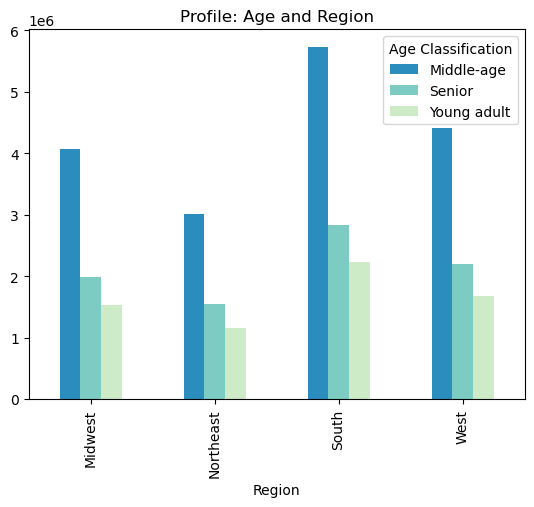

In [37]:
# Creating a bar chart between age and region

age_region_bar = age_region.plot.bar(color=sns.color_palette('GnBu_r', 3))
plt.title('Profile: Age and Region')
plt.legend(title = 'Age Classification')
plt.xlabel('Region')
plt.show()

In [38]:
# Creating a crosstab between 'age' and 'department'

age_dept = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna=False)

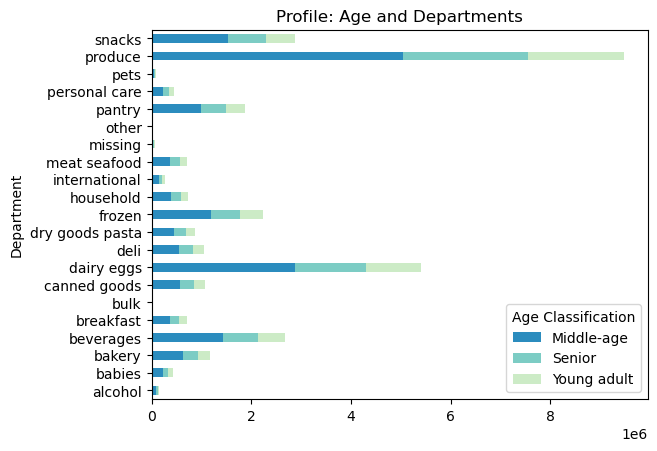

In [39]:
# Creating a stacked bar chart between 'age' and 'department'
age_dept_sbar =age_dept.plot.barh(stacked=True, color=sns.color_palette('GnBu_r',3))
plt.title('Profile: Age and Departments')
plt.legend(title = 'Age Classification')
plt.ylabel('Department')
plt.show()

In [40]:
# Creating a crosstab between 'income' and 'region'

income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna=False)

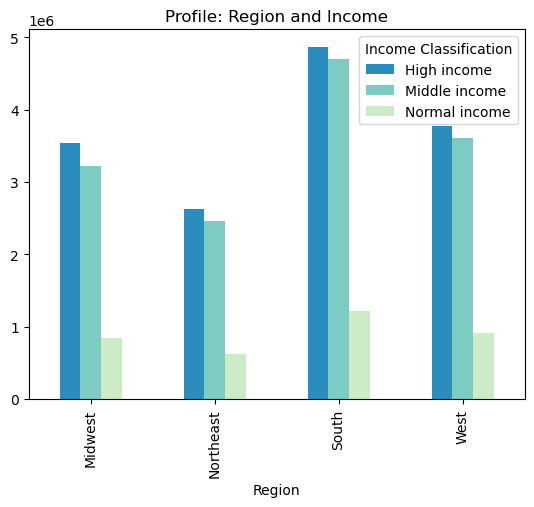

In [41]:
# Creating a bar chart between 'income' and 'region'
income_region_bar =income_region.plot.bar(color=sns.color_palette('GnBu_r',3))
plt.title('Profile: Region and Income')
plt.legend(title = 'Income Classification')
plt.xlabel('Region')
plt.show()


In [42]:
# Creating a crosstab between 'income' and 'department'

income_dept= pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna=False)

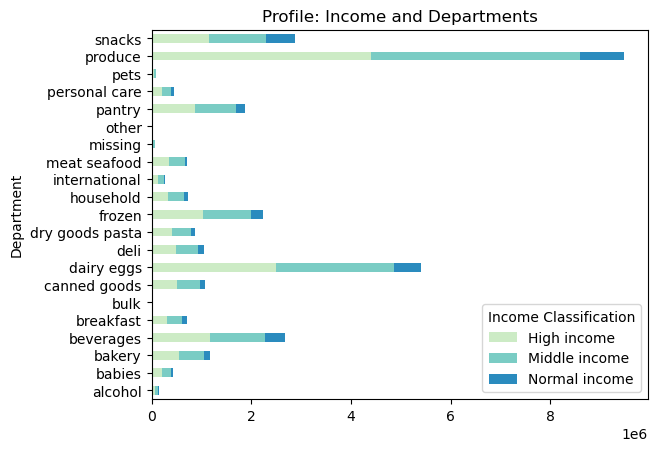

In [43]:
# Creating a stacked bar chart between 'income' and 'department'
income_dept_sbar = income_dept.plot.barh(stacked=True, color=sns.color_palette('GnBu',3))
plt.title('Profile: Income and Departments')
plt.legend(title = 'Income Classification')
plt.ylabel('Department')
plt.show()

In [44]:
# Creating a crosstab between 'dependants' and 'region'

dependants_region = pd.crosstab(df_merged['region'], df_merged['family_flag'], dropna=False)

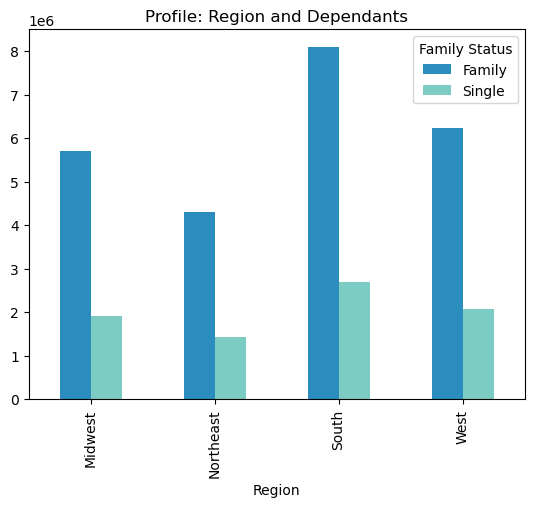

In [45]:
# Creating a bar chart between 'dependants' and 'region'
dependants_region_bar = dependants_region.plot.bar(color=sns.color_palette('GnBu_r',3))
plt.title('Profile: Region and Dependants')
plt.legend(title = 'Family Status')
plt.xlabel('Region')
plt.show()

In [46]:
# Creating a crosstab between 'dependants' and 'departments'
family_dept = pd.crosstab(df_merged['department'], df_merged['family_flag'], dropna=False)

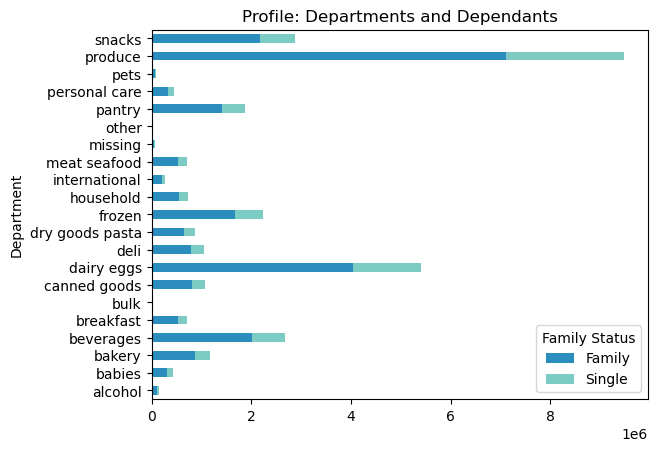

In [47]:
# Creating a stacked bar chart between 'dependants' and 'department'
family_dept_sbar = family_dept.plot.barh(stacked=True, color=sns.color_palette('GnBu_r',3))
plt.title('Profile: Departments and Dependants')
plt.legend(title = 'Family Status')
plt.ylabel('Department')
plt.show()

### 08. Export Visuals

In [ ]:
# Exporting Visuals 'age_profile_pie'
age_profile_pie.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'age_profile_pie.png'))

In [109]:
# Exporting Visuals 'age_profile_bar'
age_profile_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [37]:
# Exporting Visuals 'departments_profile_bar'
departments_profile_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'departments_profile_bar.png'))

In [50]:
# Exporting Visuals 'departments_profile_bar'
dependants_profile_pie.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'dependants_profile_pie.png'))

In [103]:
# Exporting Visuals (age_region_bar)
age_region_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'age_region_bar.png'))

In [105]:
# Exporting Visuals (age_dept_sbar)
age_dept_sbar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'age_dept_sbar.png'))

In [112]:
# Exporting Visuals (income_region_bar)
income_region_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'income_region_bar.png'))

In [116]:
# Exporting Visuals (inceome_dept_sbar)
income_dept_sbar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'income_dept_bar.png'))

In [119]:
# Exporting Visuals (dependants_region_bar)
dependants_region_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'dependants_region_bar.png'))

In [127]:
# Exporting Visuals (family_dept_sbar)
family_dept_sbar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'family_dept_sbar.png'))

### 09. Export Data

In [128]:
# Export final dataframe!

df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final.pkl'))